### Librerías y los archivos relevantes

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot
import os
import seaborn as sns

In [43]:
root_dir = './database/'
root_list = os.listdir(root_dir) # output: ['dose-rank000']
diffx = []
diffy = []
eventNumber = []
dose_rank = []
df = pd.DataFrame()
for root_folder in root_list:
    doserank_dir = root_dir + root_folder
    dr_dir = os.listdir(doserank_dir)
    for CCD_folder in dr_dir:
        CCD_dir = doserank_dir + '/' + CCD_folder
        muonccd_dir = os.listdir(CCD_dir)
        for ccdn_folder in muonccd_dir:
            ccd = CCD_dir + '/' +ccdn_folder
            data = os.listdir(ccd)
            x = np.load(ccd+'/'+data[0])
            y = np.load(ccd+'/'+data[1])
            e = np.load(ccd+'/'+data[2])
            diffx.append(x)
            diffy.append(y)
            eventNumber.append(e)
            row = pd.Series([x,y,e,root_folder,CCD_folder], index=['DiffX','DiffY', 'EventNumber', 'Dose_Rank', 'CCD'])
            df = df.append(row, ignore_index=True)

In [44]:
df

,CCD,DiffX,DiffY,Dose_Rank,EventNumber
0,muonCCD1,"[-26107.160843786743, -26109.71016000297, -261...","[7051.4526401930425, 7050.874331743865, 7050.6...",dose-rank000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,muonCCD10,"[30031.236752914883, 30026.103031870935, 30013...","[6201.259739354617, 6177.619479319446, 6171.53...",dose-rank000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,muonCCD2,"[-29815.62643442672, -29817.970505501708, -298...","[7605.331232660645, 7602.789470173128, 7605.31...",dose-rank000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,muonCCD3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",dose-rank000,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1..."
4,muonCCD4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",dose-rank000,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1..."
5,muonCCD5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",dose-rank000,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
6,muonCCD6,"[17967.741866539105, 17967.467510327915, 17966...","[-25849.68741474504, -25846.88346309696, -2584...",dose-rank000,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
7,muonCCD7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",dose-rank000,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
8,muonCCD8,"[15749.164646339568, 15746.159520683788, 15747...","[-10538.745890975033, -10536.226404939545, -10...",dose-rank000,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
9,muonCCD9,"[0.0, 14638.927162918115, 14640.73699851915, 1...","[0.0, -2902.540931930896, -2898.931706614397, ...",dose-rank000,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."


### Gráficos

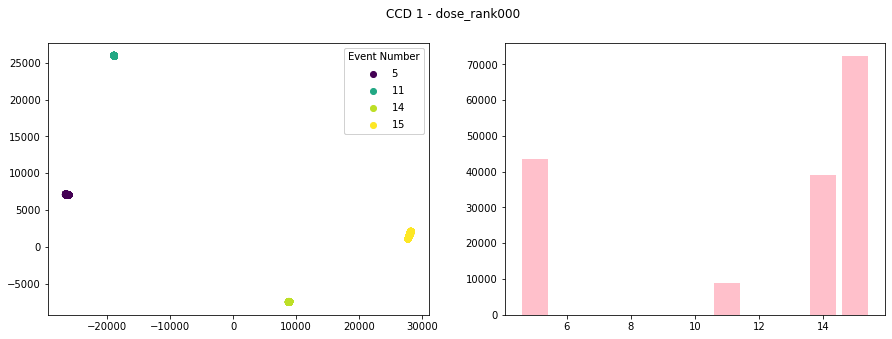

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
fig.suptitle('CCD 1 - dose_rank000')
en = df['EventNumber'][0]
(unique, counts) = np.unique(en, return_counts=True)
scatter = ax1.scatter(x=df['DiffX'][0], y=df['DiffY'][0], c=df['EventNumber'][0])
legend1 = ax1.legend(*scatter.legend_elements(),loc="upper right", title="Event Number")
ax1.add_artist(legend1)
ax2.bar(unique, counts, align='center', color='pink')
plt.show()

array([ 5, 11, 14, 15])

array([43411,  8963, 39063, 72351], dtype=int64)